## Steps of data pre-processing

- Reading lightning observation data.
- Pre-processing the data
- Storing the data into gridded format
- Reading the meteorological data
- Storing the data into netcdf format.

In [1]:
from google.colab import drive

drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


### Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
from shapely.geometry import Point, Polygon

### Reading the lightning observation data for March.

In [3]:
df0=pd.read_csv("/content/drive/MyDrive/Lightning/data/lightning observation data/LLN_data/2014/mar2014.csv")
df0.head()

,FlashID,PartitionSegmentCode,LightningTimeString,Latitude,Longitude,Height,StrokeType,Amplitude,StrokeSolution,Confidence,FlashDate
0,1549300,7,2014-03-02T00:13:11.010394781,18.42818,75.16410,14361,1,-1905,NaN,100,2014-03-02
1,1549301,7,2014-03-02T00:13:14.141027390,18.52243,75.07495,8838,1,-1857,NaN,100,2014-03-02
2,1549302,7,2014-03-02T00:13:26.182499408,18.53778,75.00712,17108,1,-2688,NaN,100,2014-03-02
3,1549303,7,2014-03-02T00:13:49.483320921,19.31112,74.09248,6681,1,-3163,NaN,100,2014-03-02
4,1549304,7,2014-03-02T00:13:57.650918513,18.37318,75.22910,17861,1,-2267,NaN,100,2014-03-02


### Pre-processing

In [4]:
df0.drop('FlashID', inplace=True, axis=1)
df0.drop('FlashDate', inplace=True, axis=1)
df0.drop('PartitionSegmentCode',inplace=True, axis=1)
df0.drop('StrokeSolution', inplace=True, axis=1)
df0.drop('Confidence', inplace=True, axis=1)
df0.drop('StrokeType', inplace=True, axis=1)
df0.drop('Height', inplace=True, axis=1)

In [5]:
li= []
from dateutil import parser

for i in df0.iloc[:,0].to_numpy():
  date_time = i.split('T')[0]+' '+i.split('T')[1].split('.')[0]
  time_obj = parser.parse(date_time)
  li.append(time_obj)

In [6]:
df0['date_time'] = li
df0.drop('LightningTimeString', inplace=True, axis=1)

In [7]:
df0=df0.loc[df0['date_time']>='2014-04-01 00:00:00']

In [8]:
df0.head()

,Latitude,Longitude,Amplitude,date_time
816597,17.52369,77.53454,69360,2014-04-01 00:00:58
816598,17.91098,78.00891,2164,2014-04-01 00:01:07
816599,17.50102,77.52860,-1260,2014-04-01 00:01:53
816600,17.92449,78.04716,5899,2014-04-01 00:05:02
816601,17.47071,77.56541,-6743,2014-04-01 00:05:41


### Reading lightning observation for April and May

In [9]:
df1=pd.read_csv("/content/drive/MyDrive/Lightning/data/lightning observation data/LLN_data/2014/apr2014.csv")
df1.head()

,FlashID,PartitionSegmentCode,LightningTimeString,Latitude,Longitude,Height,StrokeType,Amplitude,StrokeSolution,Confidence,FlashDate
0,2381747,8,2014-04-02T00:19:08.788598865,11.30668,75.69303,19751,1,8518,NaN,100,2014-04-02
1,2381748,8,2014-04-02T00:24:49.154331892,14.59616,75.71591,14141,1,3556,NaN,100,2014-04-02
2,2381749,8,2014-04-02T00:26:44.500904530,14.63744,75.71443,19331,1,3399,NaN,100,2014-04-02
3,2381750,8,2014-04-02T00:27:47.474716156,14.54764,75.67304,17562,1,-3756,NaN,100,2014-04-02
4,2381751,8,2014-04-02T00:31:06.291662186,14.63453,75.70710,17127,1,8787,NaN,100,2014-04-02


In [10]:
df2=pd.read_csv("/content/drive/MyDrive/Lightning/data/lightning observation data/LLN_data/2014/may2014.csv")
df2.head()

,FlashID,PartitionSegmentCode,LightningTimeString,Latitude,Longitude,Height,StrokeType,Amplitude,StrokeSolution,Confidence,FlashDate
0,4169297,9,2014-05-02T00:01:24.279892742,10.81117,80.55051,13920,1,-6480,NaN,100,2014-05-02
1,4169298,9,2014-05-02T00:04:31.283041566,10.45362,80.64029,0,0,-11967,NaN,100,2014-05-02
2,4169299,9,2014-05-02T00:05:28.792065352,10.28846,80.72962,19400,1,7604,NaN,100,2014-05-02
3,4169300,9,2014-05-02T00:05:53.439792603,10.51635,80.71216,0,0,-10655,NaN,100,2014-05-02
4,4169301,9,2014-05-02T00:06:32.061749309,10.77070,80.57145,15759,1,-7881,NaN,100,2014-05-02


### Further pre-processing.

In [11]:
 frames = [df1, df2]
 df = pd.concat(frames)

In [12]:
df.drop('FlashID', inplace=True, axis=1)
df.drop('FlashDate', inplace=True, axis=1)
df.drop('PartitionSegmentCode',inplace=True, axis=1)
df.drop('StrokeSolution', inplace=True, axis=1)
df.drop('Confidence', inplace=True, axis=1)
df.drop('StrokeType', inplace=True, axis=1)
df.drop('Height', inplace=True, axis=1)

In [13]:
li= []
from dateutil import parser

for i in df.iloc[:,0].to_numpy():
  date_time = i.split('T')[0]+' '+i.split('T')[1].split('.')[0]
  time_obj = parser.parse(date_time)
  li.append(time_obj)

In [14]:
df['date_time'] = li
df.drop('LightningTimeString', inplace=True, axis=1)

In [15]:
df.head()

,Latitude,Longitude,Amplitude,date_time
0,11.30668,75.69303,8518,2014-04-02 00:19:08
1,14.59616,75.71591,3556,2014-04-02 00:24:49
2,14.63744,75.71443,3399,2014-04-02 00:26:44
3,14.54764,75.67304,-3756,2014-04-02 00:27:47
4,14.63453,75.70710,8787,2014-04-02 00:31:06


In [16]:
frames= [df0,df]
df = pd.concat(frames)

### Discarding all the lightning occurrences outside the Maharashtra

In [17]:
df = df[(df["Latitude"].between(15,22))]

In [18]:
df = df[(df["Longitude"].between(73,81))]

In [19]:
df.sort_values('date_time')

,Latitude,Longitude,Amplitude,date_time
816597,17.52369,77.53454,69360,2014-04-01 00:00:58
816598,17.91098,78.00891,2164,2014-04-01 00:01:07
816599,17.50102,77.52860,-1260,2014-04-01 00:01:53
816600,17.92449,78.04716,5899,2014-04-01 00:05:02
816601,17.47071,77.56541,-6743,2014-04-01 00:05:41
...,...,...,...,...
2470689,17.30761,80.67156,-29092,2014-06-01 23:59:24
2470690,17.29031,80.80868,-6614,2014-06-01 23:59:29
2470691,17.32017,80.65721,-3721,2014-06-01 23:59:30
2470693,17.35893,80.62131,-16994,2014-06-01 23:59:40


In [20]:
df.head()

,Latitude,Longitude,Amplitude,date_time
816597,17.52369,77.53454,69360,2014-04-01 00:00:58
816598,17.91098,78.00891,2164,2014-04-01 00:01:07
816599,17.50102,77.52860,-1260,2014-04-01 00:01:53
816600,17.92449,78.04716,5899,2014-04-01 00:05:02
816601,17.47071,77.56541,-6743,2014-04-01 00:05:41


### Creating one-hour time intervals

In [21]:
from datetime import datetime, timedelta

def datetime_range(start, end, delta):
    current = start
    while current < end:
        yield current
        current += delta

dts = [dt.strftime('%Y-%m-%dT%H:%M:%S') for dt in 
       datetime_range(datetime(2014, 4, 1, 0), datetime(2014, 6, 1, 0), 
       timedelta(minutes=60))]

time_intervals = []

for i in dts:
  date_time = i.split('T')[0]+' '+i.split('T')[1]
  time_obj = parser.parse(date_time)
  time_intervals.append(time_obj)

print(time_intervals[0])
print(len(time_intervals))

2014-04-01 00:00:00
1464


In [22]:
lons = np.arange(73,81.25,0.25)

In [23]:
lats = np.arange(22,14.75,-0.25)

In [24]:
times = time_intervals  

In [25]:
data = np.zeros((1464,29,33))

### Storing lightning observations according to its occurrence over specific grid.

In [26]:
for i in range(len(df)):
  date_time = df.iloc[i,3]
  latitude,longitude,amplitude = df.iloc[i,0],df.iloc[i,1],df.iloc[i,2]
  index = 0
  for j in time_intervals:
    if(date_time<=j):
      break
    index+=1
  time_index = index-1
  lat_index,long_index = int(((latitude*10)-150)/2.5), int(((longitude*10)-730)/2.5)
  try:
    if abs(amplitude) > 0:
      data[time_index,lat_index,long_index] = 1
    else:
      data[time_index,lat_index,long_index] = 0
  except:
    print(latitude,longitude)
    break

### Reading the meteorological data

In [34]:
import xarray as xr

In [35]:
ds_disk1 = xr.open_dataset("/content/drive/MyDrive/Lightning/data/meteorological data/Single_Level/adaptor.mars.internal-1629106013.1431015-28908-8-44b48d1d-cac7-40ab-a6bf-ae04e93f45ba.nc")

In [36]:
ds_disk1

<xarray.Dataset>
Dimensions:    (latitude: 29, longitude: 33, time: 1464)
Coordinates:
  * longitude  (longitude) float32 73.0 73.25 73.5 73.75 ... 80.5 80.75 81.0
  * latitude   (latitude) float32 22.0 21.75 21.5 21.25 ... 15.5 15.25 15.0
  * time       (time) datetime64[ns] 2014-04-01 ... 2014-05-31T23:00:00
Data variables:
    cape       (time, latitude, longitude) float32 ...
    p80.162    (time, latitude, longitude) float32 ...
    p79.162    (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-08-16 09:27:02 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

In [37]:
ds_disk1.cape.values.shape

(1464, 29, 33)

In [38]:
ds_disk2 = xr.open_dataset("/content/drive/MyDrive/Lightning/data/meteorological data/Pressure_Levels/2014.nc")

In [39]:
ds_disk2

<xarray.Dataset>
Dimensions:    (latitude: 29, level: 16, longitude: 33, time: 1464)
Coordinates:
  * longitude  (longitude) float32 73.0 73.25 73.5 73.75 ... 80.5 80.75 81.0
  * latitude   (latitude) float32 22.0 21.75 21.5 21.25 ... 15.5 15.25 15.0
  * level      (level) int32 500 550 600 650 700 750 ... 900 925 950 975 1000
  * time       (time) datetime64[ns] 2014-04-01 ... 2014-05-31T23:00:00
Data variables:
    r          (time, level, latitude, longitude) float32 ...
    clwc       (time, level, latitude, longitude) float32 ...
    t          (time, level, latitude, longitude) float32 ...
    w          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-08-13 16:16:08 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

### Storing lightning occurence data and meteorological data together in a xarray dataset.

In [40]:
times = ds_disk2.time.values
lon = ds_disk2.longitude.values
lat = ds_disk2.latitude.values
pressure = ds_disk2.level.values

In [41]:
cape = ds_disk1.cape.values
p80_162 = ds_disk1['p80.162'].values
p79_162 = ds_disk1['p79.162'].values

In [42]:
r = ds_disk2.r.values
clwc = ds_disk2.clwc.values
t = ds_disk2.t.values
w = ds_disk2.w.values

In [43]:
data_2014 = xr.Dataset(
    {
        "r":(          
          ("time", "level", "latitude", "longitude"),
          r,
          dict(
            units = '%',
            long_name= 'Relative humidity',
            standard_name= 'relative_humidity',
            ),
        ),
        "clwc":(
          ("time", "level", "latitude", "longitude"),
          clwc,
          dict(
            units = 'kg kg**-1',
            long_name= 'Specific cloud liquid water content',
            ),
        ),
        "t":(
          ("time", "level", "latitude", "longitude"),
          t,
          dict(
            units = 'K',
            long_name= 'Temperature',
            standard_name = 'air_temperature',
            ),  
        ),
        "w":(
          ("time", "level", "latitude", "longitude"),
          w,  
          dict(
            units = 'Pa s**-1',
            long_name= 'Vertical velocity',
            standard_name = 'lagrangian_tendency_of_air_pressure',
            ), 
        ),
        "cape":(
            ("time", "latitude", "longitude"),
            cape,
            dict(
            units = 'J kg**-1',
            long_name= 'Convective available potential energy',
            ),
        ),
       "p80.162":(
           ("time", "latitude", "longitude"),
           p80_162,
           dict(
            units = 'kg m**-2 s**-1',
            long_name= 'Vertical integral of divergence of cloud frozen water flux',
            ),
       ),
       "p79.162":(
           ("time", "latitude", "longitude"),
           p79_162,
           dict(
            units = 'kg m**-2 s**-1',
            long_name= 'Vertical integral of divergence of cloud liquid water flux',
            ),
       ),
      "Amplitude":(
           ("time", "latitude", "longitude"),
           data,
           dict(
            units = 'Amp',
            long_name= 'Amplitude of lightning',
            ),
       ),
    },
    coords={"longitude": lon, "latitude": lat, "level": pressure ,"time": times},
    attrs=dict(description="Parameters affecting lightning data."),
)

In [44]:
data_2014

<xarray.Dataset>
Dimensions:    (latitude: 29, level: 16, longitude: 33, time: 1464)
Coordinates:
  * longitude  (longitude) float32 73.0 73.25 73.5 73.75 ... 80.5 80.75 81.0
  * latitude   (latitude) float32 22.0 21.75 21.5 21.25 ... 15.5 15.25 15.0
  * level      (level) int32 500 550 600 650 700 750 ... 900 925 950 975 1000
  * time       (time) datetime64[ns] 2014-04-01 ... 2014-05-31T23:00:00
Data variables:
    r          (time, level, latitude, longitude) float32 18.04 18.86 ... 83.0
    clwc       (time, level, latitude, longitude) float32 2.91e-11 ... 2.91e-11
    t          (time, level, latitude, longitude) float32 262.4 262.4 ... 302.9
    w          (time, level, latitude, longitude) float32 0.1869 ... -0.0007627
    cape       (time, latitude, longitude) float32 -0.0002441 ... 4.339e+03
    p80.162    (time, latitude, longitude) float32 9.537e-08 ... -7.05e-07
    p79.162    (time, latitude, longitude) float32 -2.842e-07 ... -2.093e-06
    Amplitude  (time, latitude, longitude) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    description:  Parameters affecting lightning data.

### Visualizing lightning at random time stamp.

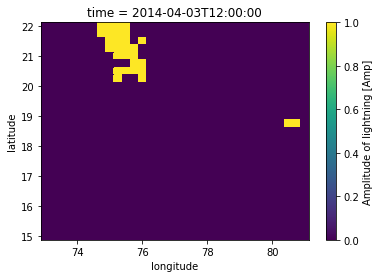

In [45]:
plot2d = data_2014.Amplitude.isel(time=60)
plot2d.plot()

### Saving the xarray dataset as netcdf file

In [46]:
data_2014.to_netcdf('/content/drive/MyDrive/Lightning/data/pre-processed data/data2014.nc')

### Pre-processed data visualization

In [ ]:
cd '/content/drive/MyDrive/Lightning data/S13'

/content/drive/MyDrive/Lightning data/S13


In [ ]:
import xarray as xr

df = xr.open_dataset('data2014.nc')

In [ ]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 5.3 MB/s 
     |████████████████████████████████| 15.4 MB 39 kB/s 
     |████████████████████████████████| 6.3 MB 50.1 MB/s 


In [ ]:
import geopandas as gpd  
shapefile = '/content/drive/MyDrive/Shape files/States/Admin2.shp'
india_states = gpd.read_file(shapefile)

In [ ]:
pip install rioxarray

     |████████████████████████████████| 46 kB 3.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 19.3 MB 1.2 MB/s 
  Created wheel for rioxarray: filename=rioxarray-0.8.0-py3-none-any.whl size=54247 sha256=53b0883828b1e337bee2c94c183fbd48b1b851cb6a531e946622edd30271e829
  Stored in directory: /root/.cache/pip/wheels/0a/e5/fb/5ac6dcd7faf126d92239d03f0e7d6c46648094d7a8706d2a63
Successfully built rioxarray


In [ ]:
import rioxarray as rio
import matplotlib.pyplot as plt
from shapely.geometry import mapping

In [ ]:
df.rio.set_spatial_dims(x_dim="longitude", y_dim="latitude", inplace=False)
df.rio.write_crs("epsg:4326", inplace=True)
Ind_Shape = gpd.read_file(shapefile, crs="epsg:4326")
maha_state = Ind_Shape.query("ST_NM == 'Maharashtra'").reset_index(drop=True)

maha_clipped= df.rio.clip(maha_state.geometry.apply(mapping), Ind_Shape.crs, drop=True)

Text(0.5, 1.0, 'Predicted Lightning data for Maharashtra')

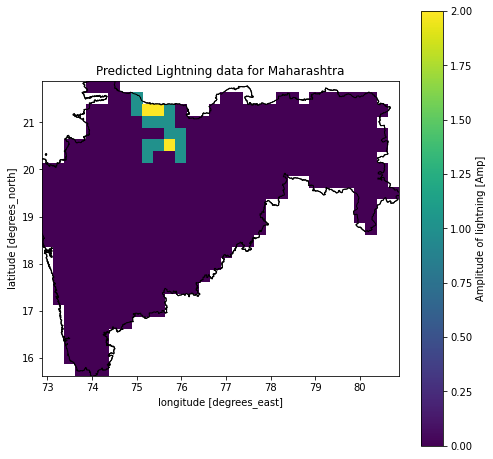

In [ ]:
fig, ax = plt.subplots(figsize = (8,8))
maha_state.to_crs(epsg=4326).plot(ax=ax, edgecolor='black', facecolor='none')
maha_clipped.Amplitude.isel(time=60).plot()
maha_state.to_crs(epsg=4326).plot(ax=ax, edgecolor='black', facecolor='none')
plt.title("Predicted Lightning data for Maharashtra")